# The frequency domain

1. Fourier transforms (DFTs)
 - Time domain -> frequency domain
2. Spectrograms
 - Frequency domain changing in time
3. Wavelet analysis
 - Frequency domain changing in time scale

## Create some example waves

Let's start with A-440, the A above middle C on a piano.

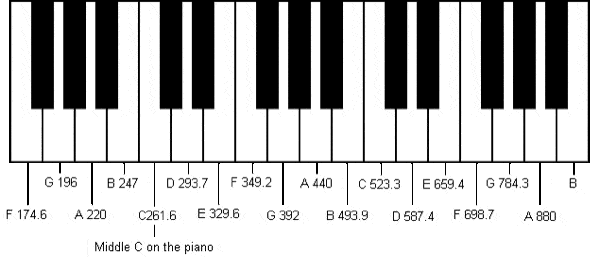

In [ ]:
tt <- seq(0, 1.5, by=1/44100)
xx <- sin(2*pi*440*tt)

In [ ]:
plot(tt, xx, type='l')

Oops! What went wrong?

Also, let's grab A an octave up.

And let's sum the two waves.

Compare it to an actual A-440 note on a piano.

In [ ]:
install.packages("tuneR")
library(tuneR)

In [ ]:
pianoa <- readMP3("piano_A.mp3")

Plot it!

## Introduce the fourier transform

1. Any time series can be represented as a sum of sinusoids.

| Time domain | Frequency domain |
| :-: | :-: |
| ![combo-time.png](combo-time.png) | ![combo-freq.png](combo-freq.png) |
| ![pianoa-time.png](pianoa-time.png) | ![pianoa-freq.png](pianoa-freq.png) |

2. The Discrete Fourier Transform reports the magnitude and phase shift of all of these sinusoids.
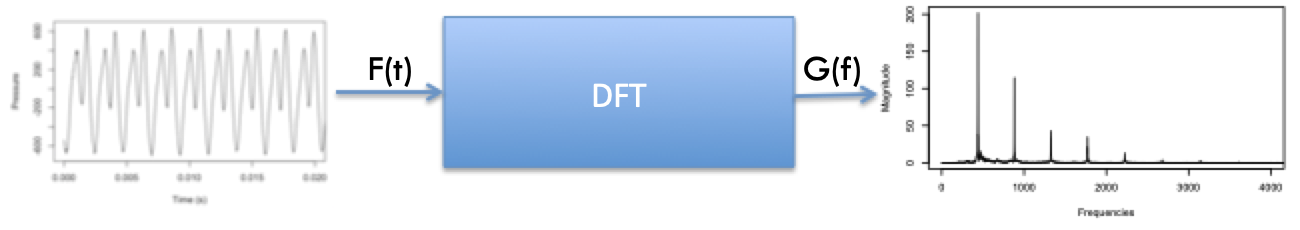

**The frequency domain is very useful!**

- Different perspective on data
  - Are there cycles? – Look for peaks
  - Are those cycles smooth? – Look for harmonics
- Convolution becomes multiplication
  - Feedback becomes division
- Heisenberg uncertainty principle
- FM radio
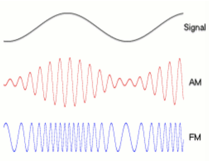

## Calculating the DFT with the Fast Fourier Transform (fft)

In [ ]:
fft(xx)

Complex values, because compactly describe **magnitude** and **phase shift**.

- Complex number (1): $a + bi$
- Complex number (2): $A e^{\theta i}$

In [ ]:
z = 2 + 3i

In [ ]:
abs(z)

In [ ]:
Arg(z)

$$A e^{\theta i} = A cos(\theta) + A sin(\theta) i$$

In [ ]:
abs(z) * cos(Arg(z))

In [ ]:
abs(z) * sin(Arg(z))

Now set our polar representation rotating at rate $\omega$:
$$A e^{(\omega t + \theta) i} = A e^{\theta i} e^{\omega t i}$$

Now, let's use the real part of that as the sinusoid we want to represent.
$$Re\{e^{(\omega t + \theta) i}\} = A cos(\omega t + \theta)$$

So the complex number tells us everything about a sinusoid of a particular frequency-- it's amplitude and phase shift.

## Plot `abs(fft(xx))`

In [ ]:
plot(abs(fft(xx)))

`fft(x)` gives a list of complex numbers equal to x-- but the second half is just a mirror of the first half (information neither created nor destroyed).

Frequencies are always:

```(0:(length(xx)-1))*SAMPLERATE/length(xx)```

In [ ]:
ff <- abs(fft(xx))
ww <- (0:(length(xx)-1))*44100/length(xx)

Plot it!

I said any time series has a frequency domain. Let's try the northern hemisphere temperature time series!

In [ ]:
df <- read.table("NH.Ts+dSST.txt", header=T)

library(reshape2)
df2 <- melt(df[, 1:13], 'Year')
df2$variable <- factor(df2$variable, levels=names(df)[2:13])
df2$time <- df2$Year + as.numeric(df2$variable) / 12 - .5

df2 <- df2[order(df2$time),]
df2$value <- as.numeric(as.character(df2$value))

plot(df2$time, df2$value / 100, type='l', xlab="Year", ylab="NH Temp.")

In [ ]:
df3 <- df2[!is.na(df2$value),]
ff <- abs(fft(df3$value)) / length(df3$value)
ww <- (0:(length(df3$value)-1))*12/length(df3$value)

plot(ww, ff, xlim=c(0, 6), type='l', xlab="Frequencies (per month)", ylab="Magnitude")

# Statistical identification of chaos

Features of interest:
 - aperiodicity
 - sensitivity to initial conditions
 - fractal state maps
 
Chaos interacts with noise, but it is not noise.

## 1. Aperiodicity

Let's make some data! First, what does noise look like?

In [ ]:
dd = seq(0, 10, by=1/365)

In [ ]:
noise = runif(length(dd), -1, 1)

In [ ]:
plot(dd, noise)

Vs. perfect periodicity.

In [ ]:
annual = ???

In [ ]:
plot(dd, annual)

Also try a non-divisible frequency.

In [ ]:
oddhourly = ???

In [ ]:
plot(dd, oddhourly)

True chaos- logistic map.

Run 3 times: r between 1 and 3, r between 3 and 3.5, and r between 3.56995 and 4.

In [ ]:
logistic = c(.5)
for (ii in 2:length(dd))
    logistic[ii] = 3.7 * logistic[ii-1] * (1 - logistic[ii-1])

In [ ]:
logistic

In [ ]:
plot(dd, logistic)

Look for periodicities.

In [ ]:
ff = abs(fft(noise)) / length(dd)
ww = (0:(length(dd)-1))*365/length(dd)

In [ ]:
plot(ww, ff)

# Sensitivity to initial conditions

Suppose we have two nearly identical experiments, each producing a timeseries. We also need to assume that noise is insignificant in its effect on states (although it can still affect observations).

In [ ]:
logistic2 = c(.5001)
for (ii in 2:length(dd))
    logistic2[ii] = 3.7 * logistic2[ii-1] * (1 - logistic2[ii-1])

In [ ]:
plot(logistic, logistic2)

Very little on the diagonal. How far away can we go and still get almost nothing on the diagonal?

Drop the initial period:

In [ ]:
plot(AAA, BBB)

In [ ]:
cor(AAA, BBB)

In [ ]:
cor(REMAINING_AAA, REMAINING_BBB)

In [ ]:
allcor = c()
for (ii in 1:length(dd)) {
    allcor[ii] = cor(logistic[1:ii], logistic2[1:ii])
}

In [ ]:
plot(dd, allcor)

# 3. Fractal state maps

Suppose the 
$$\dot{x} = f(x)$$
Let's plot $x$ vs. $\dot{x}$.

In [ ]:
plot(???, ???)

Subsample it:

In [ ]:
logistic.ss = logistic[???]
plot(???, ???)

Try different subsamplings.

## Spectrograms

In [ ]:
library(seewave)

spectro(oddhourly, f=365)

## Wavelets!

In [ ]:
library(biwavelet)

In [ ]:
wavelet = wt(cbind(dd, annual))

In [ ]:
plot(wavelet)

Also look at frequency-varying sinusoid (FM radio-like).

In [ ]:
tt <- seq(0, 3, by=1/8000)
ff <- 220 * (tt / 3)
yy <- sin(2*pi*ff*tt)

In [ ]:
wavelet = wt(cbind(tt, yy))

In [ ]:
plot(wavelet)